### Doing some simple data analysis on the ten year yield

We have downloaded historical daily constant maturity 10 year yield data from the St. Louis Fed website. This is saved in the `ten_year_yield.csv` file in this directory. We go through the process of: 
* Loading data using the `.read_csv()` method of pandas
* Some simple plotting of the ten year yield series using the built in method on the series

In [1]:
# This is how we specify what packages we want to use. 
# Very similar to when you do use packages in R as well

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [19]:
def load_ten_year_yield(file_path: str = 'ten_year_yield.csv'): 

    yld = pd.read_csv(file_path)

    # Doing formatting on the date
    yld['DATE'] = pd.to_datetime(yld['DATE'])
    yld['DGS10'] = yld['DGS10'].replace('.', np.nan)
    
    # Dropping the values that are na
    yld.dropna(inplace=True)
    yld.set_index('DATE', inplace=True)
    
    # The values come in as strings during coercion
    yld['DGS10'] = yld['DGS10'].astype(float)
    
    # Turning into series since this is one data series
    yld = yld.squeeze()
    
    return yld

In [25]:
ten_year_yield = load_ten_year_yield()

ten_year_yield_200_day_average = ten_year_yield.rolling(200).mean()
ten_year_yield_500_day_average = ten_year_yield.rolling(500).mean()

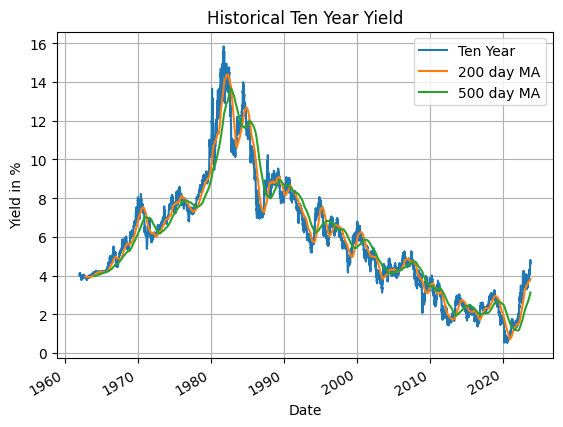

In [29]:
fig, ax = plt.subplots()

# We are plotting these three series to the same "axes" object by saying "ax=ax"
ten_year_yield.plot(ax=ax, label = 'Ten Year')
ten_year_yield_200_day_average.plot(ax =ax, label = '200 day MA')
ten_year_yield_500_day_average.plot(ax=ax, label = '500 day MA')

ax.set(title = "Historical Ten Year Yield", xlabel='Date', ylabel='Yield in %')
ax.grid()
ax.legend()

# We finally call an explcit show to this plot
plt.show()